# Basic ML:
### Trying out some basic ML on the cleaned up datasets

In [19]:
#import packages
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
#import data, test and train
train = pd.read_csv("train_final.csv", parse_dates=['timestamp'])
test = pd.read_csv("test_final.csv", parse_dates=['timestamp'])

In [15]:
train.columns

Index([u'id', u'timestamp', u'full_sq', u'floor', u'max_floor',
       u'product_type', u'sub_area', u'metro_min_walk', u'kindergarten_km',
       u'park_km', u'kremlin_km', u'oil_chemistry_km', u'nuclear_reactor_km',
       u'big_market_km', u'market_shop_km', u'detention_facility_km',
       u'public_healthcare_km', u'university_km', u'workplaces_km',
       u'preschool_km', u'big_church_km', u'okurg_district', u'pop_density',
       u'elder_ratio', u'youth_ratio', u'floor_ratio', u'year', u'month',
       u'oil_urals', u'cpi', u'eurrub',
       u'average_provision_of_build_contract_moscow', u'micex',
       u'mortgage_rate', u'rent_price_4+room_bus', u'sd_oil_yearly',
       u'sd_cpi_yearly', u'sd_eurrub_yearly', u'sd_micex_yearly',
       u'sd_mortgage_yearly', u'sd_rent_yearly', u'price_doc',
       u'log_price_doc'],
      dtype='object')

In [ ]:
train_dum = pd.get_dummies(train['sub_area'], prefix='sub', prefix_sep='__')
sub.head()
train2 = pd.concat([train2.drop('sub_area', axis=1), sub], axis=1)

prodtype = pd.get_dummies(train2['product_type'], prefix='prodtype', prefix_sep='__')
prodtype.head()
train2 = pd.concat([train2.drop('product_type', axis=1), prodtype], axis=1)


In [ ]:
'full_sq' 'rent_price_4+room_bus' 'sd_cpi_yearly' 'floor_ratio' 'metro_min_walk', 'kindergarten_km', 'nuclear_reactor_km','big_market_km', 'market_shop_km', 'detention_facility_km','public_healthcare_km', 'university_km', 'workplaces_km', 'pop_density'
       u'preschool_km', u'big_church_km', u'okurg_district', u'pop_density',

In [ ]:
'product_type', u'sub_area', u'metro_min_walk', u'kindergarten_km',
       u'park_km', u'kremlin_km', u'oil_chemistry_km', u'nuclear_reactor_km',
       u'big_market_km', u'market_shop_km', u'detention_facility_km',
       u'public_healthcare_km', u'university_km', u'workplaces_km',
       u'preschool_km', u'big_church_km', u'okurg_district', u'pop_density',
       u'elder_ratio', u'youth_ratio', u'floor_ratio', u'year', u'month',
       u'oil_urals', u'cpi', u'eurrub',
       u'average_provision_of_build_contract_moscow', u'micex',
       u'mortgage_rate', u'rent_price_4+room_bus', u'sd_oil_yearly',
       u'sd_cpi_yearly', u'sd_eurrub_yearly', u'sd_micex_yearly',
       u'sd_mortgage_yearly', u'sd_rent_yearly', u'price_doc',
       u'log_price_doc'],

In [38]:
#add a log price column:
train.loc[:, 'log_price_doc'] = np.log(train['price_doc'] + 1)

In [39]:
train_encode = train.copy()

In [40]:
#label encode as a trial for the train data using label encoder:
from sklearn import model_selection, preprocessing
for f in train_encode.columns:
    if train_encode[f].dtype=='object':
        print(f)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_encode[f].values.astype('str')))
        train_encode[f] = lbl.transform(list(train_encode[f].values.astype('str')))

product_type
sub_area
okurg_district


In [5]:
test.columns

Index([u'id', u'timestamp', u'full_sq', u'floor', u'max_floor',
       u'product_type', u'sub_area', u'metro_min_walk', u'kindergarten_km',
       u'park_km', u'kremlin_km', u'oil_chemistry_km', u'nuclear_reactor_km',
       u'big_market_km', u'market_shop_km', u'detention_facility_km',
       u'public_healthcare_km', u'university_km', u'workplaces_km',
       u'preschool_km', u'big_church_km', u'okurg_district', u'pop_density',
       u'elder_ratio', u'youth_ratio', u'floor_ratio', u'year', u'month',
       u'oil_urals', u'cpi', u'eurrub',
       u'average_provision_of_build_contract_moscow', u'micex',
       u'mortgage_rate', u'rent_price_4+room_bus', u'sd_oil_yearly',
       u'sd_cpi_yearly', u'sd_eurrub_yearly', u'sd_micex_yearly',
       u'sd_mortgage_yearly', u'sd_rent_yearly'],
      dtype='object')

## Initial EDA for the train set to explain features:

In [41]:
#plot subarea and prices (maybe add a map for the presentation with the prices on them)
train.groupby('okurg_district')['log_price_doc'].agg(['mean','count'])

,mean,count
okurg_district,,
Central,15.858084,1614
Eastern,15.551603,2894
North Eastern,15.627652,2210
North Western,15.836879,2060
Northern,15.635618,2218
Novomoskovsky,15.416950,6088
South Eastern,15.545286,3919
South Western,15.809136,2417
Southern,15.684957,3186


In [42]:
train_dollars = train.copy()

In [43]:
train_dollars["dollars"]= (train_dollars["price_doc"] * 0.018).astype("float")

In [44]:
train_dollars.groupby('okurg_district')['dollars'].agg(['mean','count'])

,mean,count
okurg_district,,
Central,186801.964082,1614
Eastern,120452.586860,2894
North Eastern,130582.773106,2210
North Western,156752.219228,2060
Northern,132921.472334,2218
Novomoskovsky,94533.530218,6088
South Eastern,112187.654295,3919
South Western,163100.589900,2417
Southern,135905.786147,3186


In [45]:
train.groupby('okurg_district')['id'].agg(['count'])

,count
okurg_district,
Central,1614
Eastern,2894
North Eastern,2210
North Western,2060
Northern,2218
Novomoskovsky,6088
South Eastern,3919
South Western,2417
Southern,3186


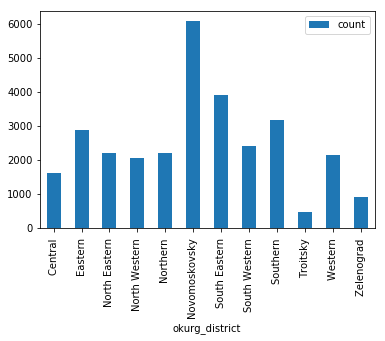

In [46]:
train.groupby('okurg_district')['id'].agg(['count']).plot(kind = 'bar')

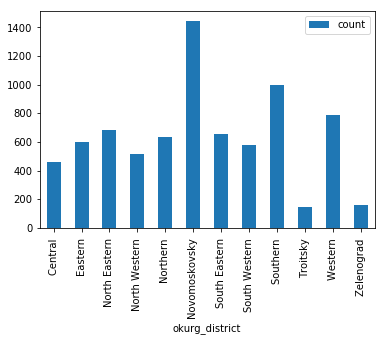

In [47]:
test.groupby('okurg_district')['id'].agg(['count']).plot(kind = 'bar')

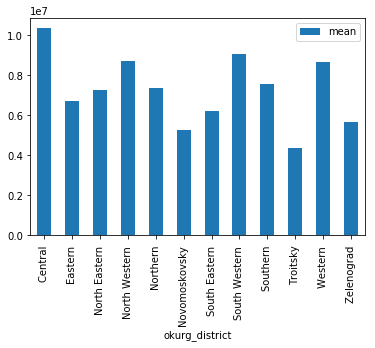

In [48]:
train.groupby('okurg_district')['price_doc'].agg(['mean']).plot(kind = 'bar')
#should really be buying in Novomo... 

## Models

In [122]:
X_moscow = train_encode[['full_sq','floor','max_floor','product_type','sub_area','metro_min_walk','kindergarten_km',
'park_km','kremlin_km','oil_chemistry_km','nuclear_reactor_km','big_market_km', 
'market_shop_km', 'detention_facility_km','public_healthcare_km','university_km',
'workplaces_km','preschool_km','big_church_km','okurg_district','pop_density',
'elder_ratio','youth_ratio','floor_ratio','year','month','oil_urals','cpi','eurrub',
'average_provision_of_build_contract_moscow','micex','mortgage_rate','rent_price_4+room_bus',
'sd_oil_yearly','sd_cpi_yearly','sd_eurrub_yearly','sd_micex_yearly','sd_mortgage_yearly','sd_rent_yearly']]


Y_moscow = train_encode['price_doc']

In [102]:
X_moscow = train_encode[['okurg_district','full_sq','rent_price_4+room_bus','sd_cpi_yearly','floor_ratio',
                         'metro_min_walk','kindergarten_km','nuclear_reactor_km','big_market_km','market_shop_km',
                         'detention_facility_km','public_healthcare_km', 'university_km','workplaces_km', 
                         'pop_density']]
Y_moscow = train_encode["price_doc"]

In [68]:
from sklearn import linear_model
ols = linear_model.LinearRegression()

In [143]:
ols.fit(X_train, Y_train)
print("R^2 for train set: %f" %ols.score(X_train, Y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test, Y_test))

R^2 for train set: 0.479974
--------------------------------------------------
R^2 for test  set: 0.505760


In [75]:
colnames = X_moscow.columns
result = pd.DataFrame(ols.coef_).transpose() #you can name the columns this way
result.columns = colnames.tolist()
result['intercept'] = ols.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result

,coefficient
full_sq,1.350784e-02
floor,3.866929e-03
max_floor,3.843141e-03
product_type,1.596397e-02
sub_area,-6.029307e-04
metro_min_walk,-1.593894e-03
kindergarten_km,-1.112521e-03
park_km,8.844474e-03
kremlin_km,-1.419937e-02
oil_chemistry_km,4.132887e-03


In [123]:
import sklearn.feature_selection as fs
select15 = fs.SelectKBest(fs.f_regression, k=15).fit_transform(X_moscow, Y_moscow)##y.flatten())
print(select15.shape)

(30142, 15)


In [124]:
print(select3[0, :])

[ 197.            4.38302366    5.82214606    4.19836111    0.70475429]


In [ ]:
#full_sq, kremlin_km, 

In [86]:
print(select10[0, :])

[ 197.           15.86004061    0.93634961    4.38302366    5.82214606
    4.19836111    2.21563708    2.22221667    0.70475429    0.55412125]


In [88]:
print X_moscow.head(1).to_string()

   full_sq  floor  max_floor  product_type  sub_area  metro_min_walk  kindergarten_km  park_km  kremlin_km  oil_chemistry_km  nuclear_reactor_km  big_market_km  market_shop_km  detention_facility_km  public_healthcare_km  university_km  workplaces_km  preschool_km  big_church_km  okurg_district  pop_density  elder_ratio  youth_ratio  floor_ratio  year  month  oil_urals    cpi  eurrub  average_provision_of_build_contract_moscow   micex  mortgage_rate  rent_price_4+room_bus  sd_oil_yearly  sd_cpi_yearly  sd_eurrub_yearly  sd_micex_yearly  sd_mortgage_yearly  sd_rent_yearly
0      197      3       19.0             1       106       15.860041         0.498263  0.93635    4.383024         13.399431            5.822146      13.007747        3.316296               4.198361              2.215637       2.222217       0.704754      0.069141       0.554121               0     0.010593     0.267821     0.120912     0.157895  2014      9    95.6732  428.6   48.97                                    

In [ ]:
#full_sq, metro_min_walk, park_km, kremlin_km, 

In [125]:
print(select15[0, :])

[  1.97000000e+02   1.58600406e+01   4.98262658e-01   9.36349613e-01
   4.38302366e+00   5.82214606e+00   3.31629647e+00   4.19836111e+00
   2.21563708e+00   2.22221667e+00   7.04754295e-01   6.91413420e-02
   5.54121253e-01   1.05928400e-02   2.67821220e-01]


In [ ]:
X_moscow = train_encode[['full_sq','kremlin_km','big_church_km','pop_density',
                         'nuclear_reactor_km','park_km', 'metro_min_walk',
                         'detention_facility_km','workplaces_km']]
Y_moscow = train_encode["price_doc"]

In [152]:
#trying out the top selected from the KBest
from sklearn.model_selection import train_test_split
X_moscow = train_encode[['full_sq', 'kremlin_km', 'pop_density', 'sd_cpi_yearly', ]]
Y_moscow = train_encode["log_price_doc"]

X_train, X_test, Y_train, Y_test = train_test_split(X_moscow, Y_moscow, test_size=0.3, random_state=42)

In [153]:
ols.fit(X_train, Y_train)
print("R^2 for train set: %f" %ols.score(X_train, Y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test, Y_test))

R^2 for train set: 0.309647
--------------------------------------------------
R^2 for test  set: 0.356155


In [ ]:
#Ridge Regression

In [139]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha = 1) # create a ridge regression instance
ridge.fit(X_moscow, Y_moscow) # fit data
ridge.coef_, ridge.intercept_ # print out the coefficients

(array([   142898.87479383,   -160963.3585611 ,  33646091.70913586]),
 1677213.3658905942)

In [140]:
print("The determination of ridge regression is: %.4f" %ridge.score(X_moscow, Y_moscow))

The determination of ridge regression is: 0.4871


In [ ]:
#elastic net?

In [147]:
X_moscow = train_encode[['full_sq','kremlin_km','big_church_km','pop_density',
                         'nuclear_reactor_km','park_km', 'metro_min_walk',
                         'detention_facility_km','workplaces_km']]
Y_moscow = train_encode["price_doc"]

In [148]:
elastic = linear_model.ElasticNet(alpha = 1, l1_ratio = 0.5)
elastic.fit(X_moscow, Y_moscow) # fit model
elastic.coef_, elastic.intercept_ # coefficients

(array([ 142322.33156279, -149938.88539986,  -96010.12895935,
           2585.30397628,  -79167.64287916,   42077.82770996,
           7628.90676091,   -1976.57348175,  -21270.66650083]),
 2603248.1946900534)

In [149]:
print("The determination of ElasticNet is: %.4f" %elastic.score(X_moscow, Y_moscow))

The determination of ElasticNet is: 0.4928


# Scaling:

### Multi Linear Regression

In [159]:
#Trying out Scaling:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import linear_model
ols = linear_model.LinearRegression()

#Train Test Split
from sklearn.model_selection import train_test_split
X_moscow = train_encode[['full_sq', 'kremlin_km', 'pop_density', 'sd_cpi_yearly']]
Y_moscow = train_encode["price_doc"]
X_train, X_test, Y_train, Y_test = train_test_split(X_moscow, Y_moscow, test_size=0.3, random_state=42)

#Scale
standard_scaler = StandardScaler()
Xtr_s = standard_scaler.fit_transform(X_train)
Xte_s = standard_scaler.transform(X_test)

robust_scaler = RobustScaler()
Xtr_r = robust_scaler.fit_transform(X_train)
Xte_r = robust_scaler.transform(X_test)

#multiple linear regression with scaling:
ols.fit(Xtr_s, Y_train)
print("R^2 for standard scaler train set: %f" %ols.score(Xtr_s, Y_train))
print('-'*50)
print("R^2 for standard scaler test  set: %f" %ols.score(Xte_s, Y_test))
print('-'*50)
ols.fit(Xtr_r, Y_train)
print("R^2 for robust scaler train set: %f" %ols.score(Xtr_r, Y_train))
print('-'*50)
print("R^2 for robust scaler test  set: %f" %ols.score(Xte_r, Y_test))


R^2 for standard scaler train set: 0.487823
--------------------------------------------------
R^2 for standard scaler test  set: 0.512264
--------------------------------------------------
R^2 for robust scaler train set: 0.487823
--------------------------------------------------
R^2 for robust scaler test  set: 0.512264


### K Best Selection with Scaling

In [191]:
#K Best using scaling
#use all parameters:
#Note: log price prodices some slightly different important factors
X_moscow = train_encode[['full_sq','floor','max_floor','product_type','sub_area','metro_min_walk','kindergarten_km',
                        'park_km','kremlin_km','oil_chemistry_km','nuclear_reactor_km','big_market_km', 
                        'market_shop_km', 'detention_facility_km','public_healthcare_km','university_km',
                        'workplaces_km','preschool_km','big_church_km','okurg_district','pop_density',
                        'elder_ratio','youth_ratio','floor_ratio','year','month','oil_urals','cpi','eurrub',
                        'average_provision_of_build_contract_moscow','micex','mortgage_rate','rent_price_4+room_bus',
                        'sd_oil_yearly','sd_cpi_yearly','sd_eurrub_yearly','sd_micex_yearly',
                        'sd_mortgage_yearly','sd_rent_yearly']]
Y_moscow = train_encode['price_doc']

#Scale X
from sklearn.preprocessing import StandardScaler, RobustScaler

standard_scaler = StandardScaler()
Xtr_s = standard_scaler.fit_transform(X_moscow)
robust_scaler = RobustScaler()
Xtr_r = robust_scaler.fit_transform(X_moscow)

#KBest Features (Enter # of Features -- 15)
import sklearn.feature_selection as fs
select15 = fs.SelectKBest(fs.f_regression, k=15).fit_transform(Xtr_s, Y_moscow)
select15r = fs.SelectKBest(fs.f_regression, k=15).fit_transform(Xtr_r, Y_moscow)

select10 = fs.SelectKBest(fs.f_regression, k=10).fit_transform(Xtr_s, Y_moscow)
select10r = fs.SelectKBest(fs.f_regression, k=10).fit_transform(Xtr_r, Y_moscow)

select5 = fs.SelectKBest(fs.f_regression, k=5).fit_transform(Xtr_s, Y_moscow)
select5r = fs.SelectKBest(fs.f_regression, k=5).fit_transform(Xtr_r, Y_moscow)

print(select15[0, :])
print(select10[0, :])
print(select5[0, :])
print('-'*50)
print Xtr_s[0,:]
print('-'*50)
print('-'*50)
print(select15r[0, :])
print(select10r[0, :])
print(select5[0, :])
print('-'*50)
print Xtr_r[0,:]

[ 6.73880676 -0.3860991  -0.22692243 -0.54543001 -1.38285456 -0.70606252
 -0.18586813 -0.93484165 -0.26000876 -0.68660523 -0.65624623 -0.41741921
 -0.59698626  0.12006196  1.13154143]
[ 6.73880676 -0.3860991  -0.54543001 -1.38285456 -0.70606252 -0.18586813
 -0.93484165 -0.68660523 -0.65624623 -0.59698626]
[ 6.73880676 -1.38285456 -0.70606252 -0.93484165 -0.68660523]
--------------------------------------------------
[ 6.73880676 -0.83319031  0.9788833   1.33324886  0.77115542 -0.3860991
 -0.22692243 -0.54543001 -1.38285456 -0.38158372 -0.70606252 -0.0303177
 -0.18586813 -0.93484165 -0.26000876 -0.68660523 -0.65624623 -0.41741921
 -0.59698626 -1.76934428  0.12006196  1.13154143 -0.7145071  -1.44002115
  0.56458681  0.64030347 -0.10503052  0.51830566  0.01903523 -0.93356177
 -0.72638263 -0.37091213  0.48557767  1.0544569   0.45429378  0.8527691
 -0.24268153 -0.47294771 -0.02817721]
--------------------------------------------------
--------------------------------------------------
[ 5.9

### Multi Linear Regression with New KBest from Above^^

In [217]:
#Trying out Scaling with different parameters:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import linear_model
ols = linear_model.LinearRegression()

#Train Test Split
from sklearn.model_selection import train_test_split
X_moscow = train_encode[['full_sq','metro_min_walk','park_km','kremlin_km','nuclear_reactor_km',
                         'market_shop_km','detention_facility_km','university_km','workplaces_km','okurg_district']]
Y_moscow = train_encode["price_doc"]
X_train, X_test, Y_train, Y_test = train_test_split(X_moscow, Y_moscow, test_size=0.3, random_state=42)

# #Scale
# standard_scaler = StandardScaler()
# Xtr_s = standard_scaler.fit_transform(X_train)
# Xte_s = standard_scaler.transform(X_test)

# robust_scaler = RobustScaler()
# Xtr_r = robust_scaler.fit_transform(X_train)
# Xte_r = robust_scaler.transform(X_test)

#multiple linear regression with scaling:
ols.fit(X_train, Y_train)
print("R^2 for train set: %f" %ols.score(X_train, Y_train))
print('-'*50)
print("R^2 for test  set: %f" %ols.score(X_test, Y_test))
# print('-'*50)
# ols.fit(Xtr_r, Y_train)
# print("R^2 for robust scaler train set: %f" %ols.score(Xtr_r, Y_train))
# print('-'*50)
# print("R^2 for robust scaler test  set: %f" %ols.score(Xte_r, Y_test))


R^2 for train set: 0.484881
--------------------------------------------------
R^2 for test  set: 0.511360


In [216]:
#label encode for the test data using label encoder:
from sklearn import model_selection, preprocessing
for f in test.columns:
    if test[f].dtype=='object':
        print(f)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(test[f].values.astype('str')))
        test[f] = lbl.transform(list(test[f].values.astype('str')))

product_type
sub_area
okurg_district


In [219]:
#Predict based on model from cell above and generate a file to send to Kaggle:
#log_y_test = forest.predict(X_test)
#X_test = test[model_features_noMissing].values

X_testpred = test[['full_sq','metro_min_walk','park_km','kremlin_km','nuclear_reactor_km',
              'market_shop_km','detention_facility_km','university_km','workplaces_km','okurg_district']]

y_pred = ols.predict(X_testpred)
submission = pd.DataFrame({'id': np.array(test.index)+30474, 'price_doc': y_pred})
submission.to_csv('submission_brandy.csv', index = False)

In [210]:
#Trying out Scaling with different parameters:
#multi using log and okurg district instead of big church:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import linear_model
ols = linear_model.LinearRegression()

#Train Test Split
from sklearn.model_selection import train_test_split
X_moscow = train_encode[['full_sq','metro_min_walk','park_km','kremlin_km','nuclear_reactor_km',
                         'market_shop_km','detention_facility_km','university_km','workplaces_km','okurg_district']]
Y_moscow = train_encode["price_doc"]
X_train, X_test, Y_train, Y_test = train_test_split(X_moscow, Y_moscow, test_size=0.3, random_state=42)

#Scale
standard_scaler = StandardScaler()
Xtr_s = standard_scaler.fit_transform(X_train)
Xte_s = standard_scaler.transform(X_test)

robust_scaler = RobustScaler()
Xtr_r = robust_scaler.fit_transform(X_train)
Xte_r = robust_scaler.transform(X_test)

#multiple linear regression with scaling:
ols.fit(Xtr_s, Y_train)
print("R^2 for standard scaler train set: %f" %ols.score(Xtr_s, Y_train))
print('-'*50)
print("R^2 for standard scaler test  set: %f" %ols.score(Xte_s, Y_test))
print('-'*50)
ols.fit(Xtr_r, Y_train)
print("R^2 for robust scaler train set: %f" %ols.score(Xtr_r, Y_train))
print('-'*50)
print("R^2 for robust scaler test  set: %f" %ols.score(Xte_r, Y_test))


R^2 for standard scaler train set: 0.484881
--------------------------------------------------
R^2 for standard scaler test  set: 0.511360
--------------------------------------------------
R^2 for robust scaler train set: 0.484881
--------------------------------------------------
R^2 for robust scaler test  set: 0.511360


In [201]:
#Trying out some of the random features from macro data:

#X_moscow = train_encode[['full_sq','floor','max_floor','product_type','sub_area','metro_min_walk','kindergarten_km',
#                         'park_km','kremlin_km','oil_chemistry_km','nuclear_reactor_km','big_market_km', 
#                         'market_shop_km', 'detention_facility_km','public_healthcare_km','university_km',
#                         'workplaces_km','preschool_km','big_church_km','okurg_district','pop_density',
#                         'elder_ratio','youth_ratio','floor_ratio','year','month','oil_urals','cpi','eurrub',
#                         'average_provision_of_build_contract_moscow','micex','mortgage_rate','rent_price_4+room_bus',
#                         'sd_oil_yearly','sd_cpi_yearly','sd_eurrub_yearly','sd_micex_yearly',
#                         'sd_mortgage_yearly','sd_rent_yearly']]
#Y_moscow = train_encode['price_doc']

#Train Test Split
from sklearn.model_selection import train_test_split
X_moscow = train_encode[['full_sq','metro_min_walk','park_km','kremlin_km','nuclear_reactor_km',
                         'market_shop_km','detention_facility_km','university_km','workplaces_km','okurg_district',
                        'cpi','eurrub','mortgage_rate','rent_price_4+room_bus','sd_micex_yearly','sd_rent_yearly']]
Y_moscow = train_encode["price_doc"]
X_train, X_test, Y_train, Y_test = train_test_split(X_moscow, Y_moscow, test_size=0.3, random_state=42)

#Scale
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
Xtr_s = standard_scaler.fit_transform(X_train)
Xte_s = standard_scaler.transform(X_test)

#multiple linear regression with scaling:
ols.fit(Xtr_s, Y_train)
print("R^2 for standard scaler train set: %f" %ols.score(Xtr_s, Y_train))
print('-'*50)
print("R^2 for standard scaler test  set: %f" %ols.score(Xte_s, Y_test))

R^2 for standard scaler train set: 0.495699
--------------------------------------------------
R^2 for standard scaler test  set: 0.520433


In [207]:
#Trying out some of the random features from macro data:

X_moscow = train_encode[['full_sq','floor','max_floor','product_type','sub_area','metro_min_walk','kindergarten_km',
                        'park_km','kremlin_km','oil_chemistry_km','nuclear_reactor_km','big_market_km', 
                        'market_shop_km', 'detention_facility_km','public_healthcare_km','university_km',
                        'workplaces_km','preschool_km','big_church_km','okurg_district','pop_density',
                        'elder_ratio','youth_ratio','floor_ratio','year','month','oil_urals','cpi','eurrub',
                        'average_provision_of_build_contract_moscow','micex','mortgage_rate','rent_price_4+room_bus',
                        'sd_oil_yearly','sd_cpi_yearly','sd_eurrub_yearly','sd_micex_yearly',
                        'sd_mortgage_yearly','sd_rent_yearly']]
Y_moscow = train_encode['price_doc']

#Train Test Split
from sklearn.model_selection import train_test_split
# #X_moscow = train_encode[['full_sq','metro_min_walk','park_km','kremlin_km','nuclear_reactor_km',
#                          'market_shop_km','detention_facility_km','university_km','workplaces_km','okurg_district',
#                         'cpi','eurrub','mortgage_rate','rent_price_4+room_bus','sd_micex_yearly','sd_rent_yearly']]
#Y_moscow = train_encode["price_doc"]
X_train, X_test, Y_train, Y_test = train_test_split(X_moscow, Y_moscow, test_size=0.3, random_state=42)

#Scale
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
Xtr_s = standard_scaler.fit_transform(X_train)
Xte_s = standard_scaler.transform(X_test)

#multiple linear regression with scaling:
ols.fit(Xtr_s, Y_train)
print("R^2 for standard scaler train set: %f" %ols.score(Xtr_s, Y_train))
print('-'*50)
print("R^2 for standard scaler test  set: %f" %ols.score(Xte_s, Y_test))

R^2 for standard scaler train set: 0.518643
--------------------------------------------------
R^2 for standard scaler test  set: 0.540316


In [208]:
#Trying out some of the random features from macro data:

#X_moscow = train_encode[['full_sq','floor','max_floor','product_type','sub_area','metro_min_walk','kindergarten_km',
#                         'park_km','kremlin_km','oil_chemistry_km','nuclear_reactor_km','big_market_km', 
#                         'market_shop_km', 'detention_facility_km','public_healthcare_km','university_km',
#                         'workplaces_km','preschool_km','big_church_km','okurg_district','pop_density',
#                         'elder_ratio','youth_ratio','floor_ratio','year','month','oil_urals','cpi','eurrub',
#                         'average_provision_of_build_contract_moscow','micex','mortgage_rate','rent_price_4+room_bus',
#                         'sd_oil_yearly','sd_cpi_yearly','sd_eurrub_yearly','sd_micex_yearly',
#                         'sd_mortgage_yearly','sd_rent_yearly']]
#Y_moscow = train_encode['price_doc']

#Train Test Split
from sklearn.model_selection import train_test_split
X_moscow = train_encode[['full_sq','metro_min_walk','kremlin_km','nuclear_reactor_km',
                         'market_shop_km','detention_facility_km','university_km','okurg_district']]
Y_moscow = train_encode["price_doc"]
X_train, X_test, Y_train, Y_test = train_test_split(X_moscow, Y_moscow, test_size=0.3, random_state=42)

#Scale
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
Xtr_s = standard_scaler.fit_transform(X_train)
Xte_s = standard_scaler.transform(X_test)

#multiple linear regression with scaling:
ols.fit(Xtr_s, Y_train)
print("R^2 for standard scaler train set: %f" %ols.score(Xtr_s, Y_train))
print('-'*50)
print("R^2 for standard scaler test  set: %f" %ols.score(Xte_s, Y_test))

R^2 for standard scaler train set: 0.484503
--------------------------------------------------
R^2 for standard scaler test  set: 0.511265


### Ridge Regression with Scaling

In [200]:
#Ridge Regression with scaling
#Performs the same with robust and standard scaling
#Performs the same without the scaling
#SLIGHTLY better with the okurg district

Xr_moscow = train_encode[['full_sq','metro_min_walk','park_km','kremlin_km','nuclear_reactor_km',
                         'market_shop_km','detention_facility_km','university_km','workplaces_km','okurg_district']]
Xs_moscow = train_encode[['full_sq','metro_min_walk','park_km','kremlin_km','nuclear_reactor_km',
                         'market_shop_km','detention_facility_km','university_km','workplaces_km','big_church_km']]
Yr_moscow = train_encode["price_doc"]

Xs_moscow = standard_scaler.fit_transform(Xs_moscow)
Xr_moscow = robust_scaler.fit_transform(Xr_moscow)

from sklearn import linear_model
ridge = linear_model.Ridge(alpha = 1) # create a ridge regression instance
ridge.fit(Xs_moscow, Yr_moscow) # fit data
ridge.coef_, ridge.intercept_ # print out the coefficients
print("The determination of ridge regression with standard scaling is: %.4f" %ridge.score(Xs_moscow, Yr_moscow))
ridge.fit(Xr_moscow, Yr_moscow) # fit data
ridge.coef_, ridge.intercept_ # print out the coefficients
print("The determination of ridge regression with robust scaling is: %.4f" %ridge.score(Xr_moscow, Yr_moscow))

The determination of ridge regression with standard scaling is: 0.4932
The determination of ridge regression with robust scaling is: 0.4938


In [161]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(Xtr_s, Y_train)
acc_s = knn.score(Xte_s, Y_test)
print("Testset accuracy using standard scaler: %.3f" % acc_s)
knn.fit(Xtr_r, Y_train)
acc_r = knn.score(Xte_r, Y_test)
print("Testset accuracy using robust scaler:   %.3f" % acc_r)

Testset accuracy using standard scaler: 0.043
Testset accuracy using robust scaler:   0.045


This is from Hassem:

In [ ]:
train2 = train.copy()

sub = pd.get_dummies(train2['sub_area'], prefix='sub', prefix_sep='__')
sub.head()
train2 = pd.concat([train2.drop('sub_area', axis=1), sub], axis=1)

prodtype = pd.get_dummies(train2['product_type'], prefix='prodtype', prefix_sep='__')
prodtype.head()
train2 = pd.concat([train2.drop('product_type', axis=1), prodtype], axis=1)

print train2.shape

train2.head()

In [ ]:
X = train2.drop(["id", "price_doc"], axis = 1)

Y = train2["price_doc"]

model = sm.OLS(Y, X)
X = sm.add_constant(X)
results = model.fit()
print(results.summary())

In [ ]:
test2 = test.copy()

sub = pd.get_dummies(test2['sub_area'], prefix='sub', prefix_sep='__')
sub.head()
test2 = pd.concat([test2.drop('sub_area', axis=1), sub], axis=1)

prodtype = pd.get_dummies(test2['product_type'], prefix='prodtype', prefix_sep='__')
prodtype.head()
test2 = pd.concat([test2.drop('product_type', axis=1), prodtype], axis=1)

print test2.shape

test2.head()

In [ ]:
test_y = results.predict(test2.drop("id", axis = 1))

In [ ]:
submission.loc[submission.price_doc < 0, ] 